In [1]:
import yfinance as yf

### Import and Preprocess Data from Yahoo Finance

In [87]:
df = yf.Ticker('^GSPC')
df = df.history(period="max")

In [88]:
del df['Dividends']
del df['Stock Splits']

In [89]:
df = df.loc["1990-01-01":].copy()
df.index = df.index.strftime('%Y-%m-%d')

In [90]:
df

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000
...,...,...,...,...,...
2023-09-11,4480.979980,4490.770020,4467.890137,4487.459961,3369920000
2023-09-12,4473.270020,4487.109863,4456.830078,4461.899902,3435740000
2023-09-13,4462.649902,4479.390137,4453.520020,4467.439941,3529430000


### Plot Closing Price History

In [83]:
import matplotlib.pyplot as plt

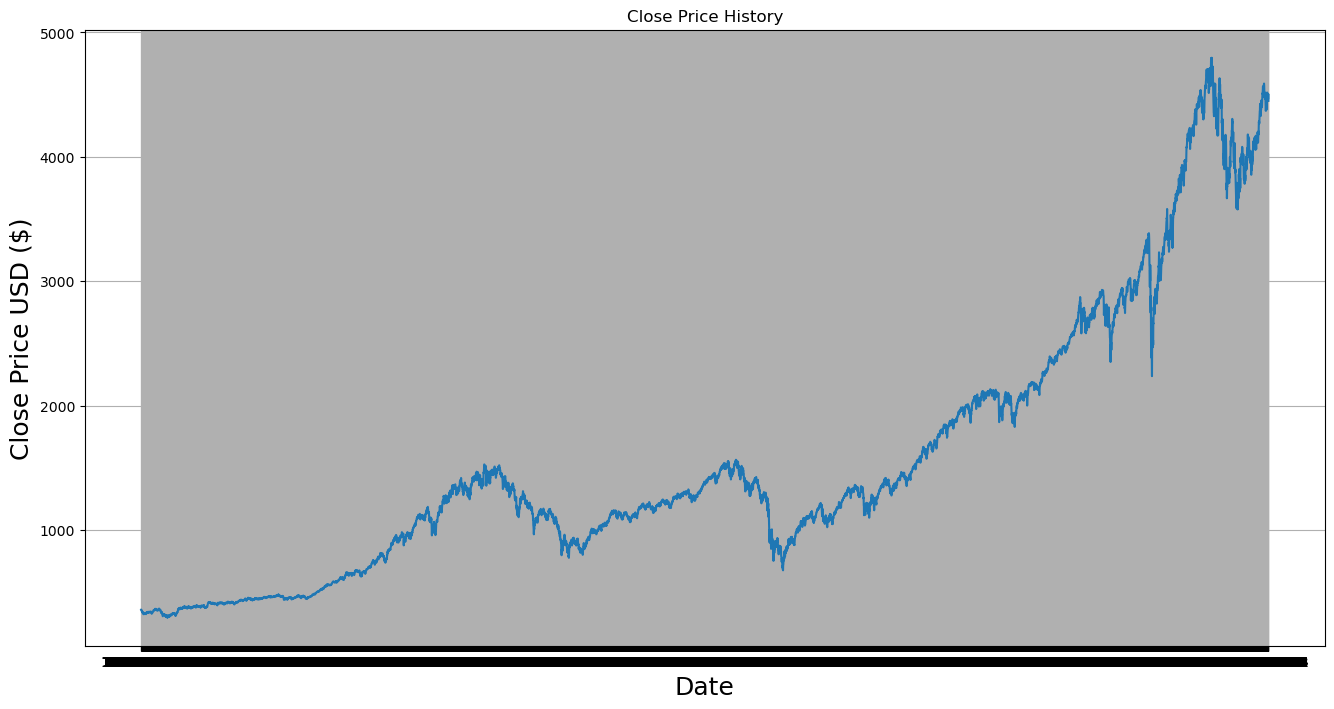

In [84]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.grid()
plt.show()

### Further Data Preprocessing

In [91]:
# Create Tomorrow and Target variable columns for prediction
df["Tomorrow"] = df["Close"].shift(-1)
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

In [92]:
df = df.dropna()

In [93]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-09-08,4451.299805,4473.529785,4448.379883,4457.490234,3259290000,4487.459961,1
2023-09-11,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902,0
2023-09-12,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1


### Data Preprocessing

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [29]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

X, y = [], []

In [31]:
df_scaled.shape

(8491, 7)

In [32]:
window_size = 10

In [34]:
# Create sequences of data for input and labels
for i in range(len(df_scaled) - window_size):
        X.append(df_scaled[i:i+window_size, :-1])
        y.append(df_scaled[i+window_size, -1])

In [37]:
X, y = np.array(X), np.array(y)

### Split Data and Create Model 

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [57]:
model = Sequential()
model.add(LSTM(50,input_shape = (X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer ='adam',loss ='mean_squared_error')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
212/212 [==============================] - 8s 20ms/step - loss: 0.2604 - val_loss: 0.2478
Epoch 2/50
212/212 [==============================] - 3s 15ms/step - loss: 0.2518 - val_loss: 0.2475
Epoch 3/50
212/212 [==============================] - 3s 15ms/step - loss: 0.2508 - val_loss: 0.2471
Epoch 4/50
212/212 [==============================] - 3s 15ms/step - loss: 0.2514 - val_loss: 0.2470
Epoch 5/50
212/212 [==============================] - 3s 14ms/step - loss: 0.2505 - val_loss: 0.2478
Epoch 6/50
212/212 [==============================] - 3s 14ms/step - loss: 0.2501 - val_loss: 0.2478
Epoch 7/50
212/212 [==============================] - 3s 15ms/step - loss: 0.2503 - val_loss: 0.2543
Epoch 8/50
212/212 [==============================] - 4s 17ms/step - loss: 0.2502 - val_loss: 0.2468
Epoch 9/50
212/212 [==============================] - 4s 18ms/step - loss: 0.2504 - val_loss: 0.2466
Epoch 10/50
212/212 [==============================] - 3s 14ms/step - loss: 0.2501 - val_lo

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                11400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11451 (44.73 KB)
Trainable params: 11451 (44.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
preds = model.predict(X_test) 

54/54 [==============================] - 1s 9ms/step


In [71]:
preds

array([[0.47355896],
       [0.45684993],
       [0.4851622 ],
       ...,
       [0.48192203],
       [0.47240856],
       [0.48220566]], dtype=float32)

In [72]:
preds = preds

array([[0.47355896],
       [0.45684993],
       [0.4851622 ],
       ...,
       [0.48192203],
       [0.47240856],
       [0.48220566]], dtype=float32)

### Plot Loss

In [44]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

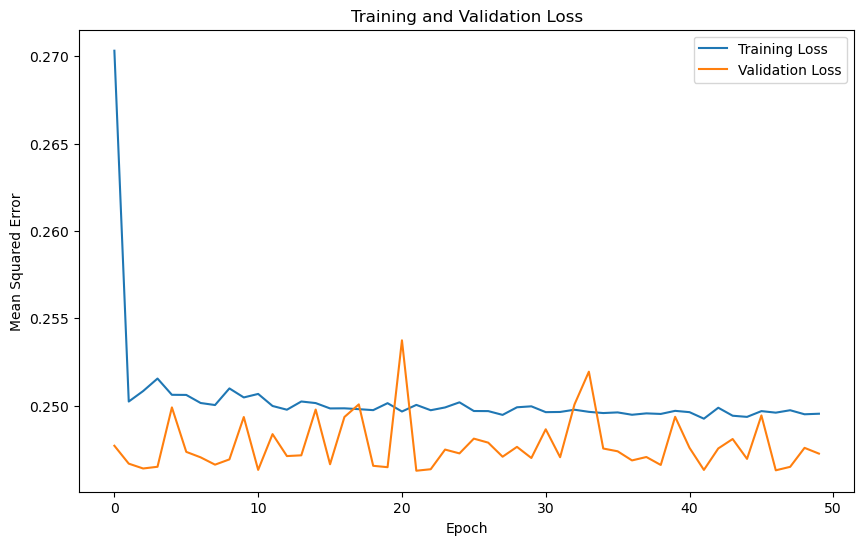

In [45]:
plot_loss(history)

### Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [67]:
cm = confusion_matrix(y_test,y_pred_binary)
print(cm)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

[[742   0]
 [955   0]]
Accuracy: 0.44
